In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go


In [5]:
tls.set_credentials_file(api_key="HOMenZTaLZGBpFMBkS7M")

In [27]:
# Load in csv
crimes_df = pd.read_csv("Chicago_Crimes_2012_to_2017_v2.csv", index_col="Date")
crimes_df.head()

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [28]:
crimes_df.shape

(1456714, 22)

In [29]:
crimes2016_df = crimes_df.loc[crimes_df["Year"] == 2016]
crimes2016_df.head()

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [30]:
print(type(crimes2016_df))

<class 'pandas.core.frame.DataFrame'>


In [31]:
crimes2016_df = crimes2016_df.iloc[:, 3: ]
crimes2016_df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [32]:
crimes2016_df.index = pd.to_datetime(crimes2016_df.index)

In [33]:
print(crimes2016_df.shape)
print(crimes2016_df.head())

(265462, 19)
                                   Block  IUCR            Primary Type  \
Date                                                                     
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
Date                                                                        
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-0

In [34]:
s = crimes2016_df[['Primary Type']]

In [35]:
s.head()

,Primary Type
Date,
2016-05-03 23:40:00,BATTERY
2016-05-03 21:40:00,BATTERY
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION
2016-05-03 22:10:00,BATTERY
2016-05-03 22:00:00,THEFT


In [36]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [37]:
crime_count.head()

,Primary Type,counts
0,THEFT,61167
1,BATTERY,50243
2,CRIMINAL DAMAGE,30978
3,ASSAULT,18710
4,DECEPTIVE PRACTICE,17291


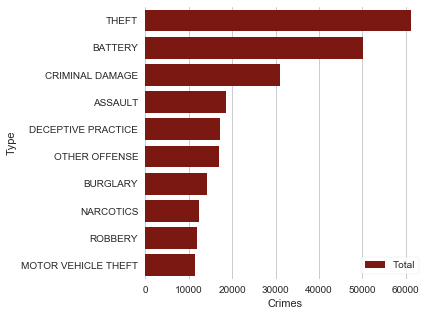

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))


# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [39]:
crimes2016_df["Location"].isnull().sum()

14189

In [40]:
crimes2016_df["Location"].replace("", np.nan, inplace=True)

In [41]:
crimes2016_df.dropna(subset=["Location"], inplace=True)

In [42]:
crimes2016_df["Location"].isnull().sum()

0

In [45]:
chicago_crimes2016_df = crimes2016_df [["Primary Type", "Description","District","Ward","Latitude", "Longitude","Location","Arrest","Year"]]
chicago_crimes2016_df.head()

,Primary Type,Description,District,Ward,Latitude,Longitude,Location,Arrest,Year
Date,,,,,,,,,
2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,10.0,24.0,41.864073,-87.706819,"(41.864073157, -87.706818608)",True,2016
2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,3.0,20.0,41.782922,-87.604363,"(41.782921527, -87.60436317)",False,2016
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,15.0,37.0,41.894908,-87.758372,"(41.894908283, -87.758371958)",False,2016
2016-05-03 22:10:00,BATTERY,SIMPLE,15.0,28.0,41.885687,-87.749516,"(41.885686845, -87.749515983)",False,2016
2016-05-03 22:00:00,THEFT,$500 AND UNDER,15.0,28.0,41.886297,-87.761751,"(41.886297242, -87.761750709)",False,2016


In [46]:
chicago_crimes2016_df.rename(columns={"Primary Type": "Crime Type", "Description": "Crime Description"},inplace=True)

C:\Users\asanj\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [47]:
chicago_crimes2016_df.head()

,Crime Type,Crime Description,District,Ward,Latitude,Longitude,Location,Arrest,Year
Date,,,,,,,,,
2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,10.0,24.0,41.864073,-87.706819,"(41.864073157, -87.706818608)",True,2016
2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,3.0,20.0,41.782922,-87.604363,"(41.782921527, -87.60436317)",False,2016
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,15.0,37.0,41.894908,-87.758372,"(41.894908283, -87.758371958)",False,2016
2016-05-03 22:10:00,BATTERY,SIMPLE,15.0,28.0,41.885687,-87.749516,"(41.885686845, -87.749515983)",False,2016
2016-05-03 22:00:00,THEFT,$500 AND UNDER,15.0,28.0,41.886297,-87.761751,"(41.886297242, -87.761750709)",False,2016


In [48]:
chicago_crimes2016_df.groupby("Crime Type").count()

,Crime Description,District,Ward,Latitude,Longitude,Location,Arrest,Year
Crime Type,,,,,,,,
ARSON,504,504,504,504,504,504,504,504
ASSAULT,18080,18080,18080,18080,18080,18080,18080,18080
BATTERY,48686,48686,48686,48686,48686,48686,48686,48686
BURGLARY,13613,13613,13613,13613,13613,13613,13613,13613
CONCEALED CARRY LICENSE VIOLATION,35,35,35,35,35,35,35,35
CRIM SEXUAL ASSAULT,1267,1267,1267,1267,1267,1267,1267,1267
CRIMINAL DAMAGE,30189,30189,30189,30189,30189,30189,30189,30189
CRIMINAL TRESPASS,6209,6209,6209,6209,6209,6209,6209,6209
DECEPTIVE PRACTICE,14049,14049,14049,14049,14049,14049,14049,14049


In [55]:
chicago_crimes2016_df.groupby("Crime Description").sum()

,District,Ward,Latitude,Longitude,Arrest,Year
Crime Description,,,,,,
$500 AND UNDER,269743.0,540612.0,964454.675074,-2.020206e+06,958.0,46454688
ABUSE/NEGLECT: CARE FACILITY,51.0,106.0,125.703976,-2.630565e+02,0.0,6048
AGG CRIM SEX ABUSE FAM MEMBER,915.0,1641.0,3096.112731,-6.489479e+03,5.0,149184
AGG CRIMINAL SEXUAL ABUSE,1280.0,2508.0,5102.771709,-1.069632e+04,20.0,245952
AGG PO HANDS ETC SERIOUS INJ,202.0,390.0,795.267411,-1.665765e+03,15.0,38304
AGG PO HANDS NO/MIN INJURY,9276.0,19331.0,35939.497420,-7.531153e+04,734.0,1731744
AGG PRO EMP HANDS SERIOUS INJ,345.0,648.0,1338.520479,-2.805261e+03,18.0,64512
AGG PRO.EMP: HANDGUN,233.0,516.0,1212.805534,-2.541986e+03,14.0,58464
AGG PRO.EMP: OTHER DANG WEAPON,982.0,2147.0,4058.350790,-8.503736e+03,34.0,195552


In [60]:
chicago_crimes2016_df.groupby("Year").count()

,Crime Type,Crime Description,District,Ward,Latitude,Longitude,Location,Arrest
Year,,,,,,,,
2016,251273,251273,251273,251273,251273,251273,251273,251273


In [61]:
chicago_crimes2016_df.to_csv('chicago_crimes2016.csv')

In [69]:
chicago_crimes2016x_df = chicago_crimes2016_df [["Crime Type","Latitude","Longitude","Arrest","Year"]]
chicago_crimes2016x_df.reset_index(drop = True, inplace = True)
chicago_crimes2016x_df.head()

,Crime Type,Latitude,Longitude,Arrest,Year
0,BATTERY,41.864073,-87.706819,True,2016
1,BATTERY,41.782922,-87.604363,False,2016
2,PUBLIC PEACE VIOLATION,41.894908,-87.758372,False,2016
3,BATTERY,41.885687,-87.749516,False,2016
4,THEFT,41.886297,-87.761751,False,2016


In [70]:
sample_crimes2016_df = chicago_crimes2016_df.sample(n=10000)

In [71]:
sample_crimes2016_df.shape

(10000, 9)

In [75]:
sample_crimes2016_df.to_csv('chicago_crimes2016.csv')

In [76]:
chicago_crimes2016x_df.to_csv('chicago_crimes2016x.csv')